In [1]:
%matplotlib inline

In [2]:
import pathlib

In [3]:
import joblib
import lightgbm as lgb
import pandas as pd

In [4]:
categorical_cols = ["store_id", "item_id", "dept_id", "cat_id", "state_id", "event_name_1", "event_type_1", "event_name_2", "event_type_2"]

In [5]:
root_dir_path = pathlib.Path("..")
data_dir_path = root_dir_path / "data"
processed_dir_path = data_dir_path / "processed"
train_path = processed_dir_path / "train_filtered.parquet"
models_dir_path = root_dir_path / "models"
model_path = models_dir_path / "model.joblib"

In [6]:
train = pd.read_parquet(train_path)

In [7]:
train.shape

(45942500, 20)

In [8]:
train[categorical_cols] = train[categorical_cols].astype("category")

In [9]:
is_train = train["date"] <= "2016-01-28"
train, valid = train[is_train], train[~is_train]

In [10]:
train.shape

(43290018, 20)

In [11]:
valid.shape

(2652482, 20)

In [12]:
data = train.select_dtypes(["category", "number"])
data_valid = valid.select_dtypes(["category", "number"])

In [13]:
data.describe(include="all")

,item_id,store_id,dept_id,cat_id,state_id,demand,wm_yr_wk,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price,month,weekday
count,43290018,43290018,43290018,43290018,43290018,4.329002e+07,4.329002e+07,3435036,3435036,94157,94157,4.329002e+07,4.329002e+07,4.329002e+07,4.329002e+07,4.329002e+07,4.329002e+07
unique,3049,10,7,3,3,NaN,NaN,30,4,4,2,NaN,NaN,NaN,NaN,NaN,NaN
top,HOUSEHOLD_2_299,TX_2,FOODS_3,FOODS,CA,NaN,NaN,MartinLutherKingDay,National,Father's day,Cultural,NaN,NaN,NaN,NaN,NaN,NaN
freq,18260,4449544,11609036,20107581,17120247,NaN,NaN,125376,1208676,28221,66560,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,1.432720e+00,1.135948e+04,NaN,NaN,NaN,NaN,3.273593e-01,3.278231e-01,3.278760e-01,4.403153e+00,6.617501e+00,2.998727e+00
std,NaN,NaN,NaN,NaN,NaN,4.351036e+00,1.356624e+02,NaN,NaN,NaN,NaN,4.692496e-01,4.694200e-01,4.694394e-01,3.394033e+00,3.463750e+00,1.999915e+00
min,NaN,NaN,NaN,NaN,NaN,0.000000e+00,1.110100e+04,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e-02,1.000000e+00,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,0.000000e+00,1.123900e+04,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,2.180000e+00,4.000000e+00,1.000000e+00
50%,NaN,NaN,NaN,NaN,NaN,0.000000e+00,1.135200e+04,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,3.470000e+00,7.000000e+00,3.000000e+00
75%,NaN,NaN,NaN,NaN,NaN,1.000000e+00,1.150100e+04,NaN,NaN,NaN,NaN,1.000000e+00,1.000000e+00,1.000000e+00,5.840000e+00,1.000000e+01,5.000000e+00


In [14]:
X = data
X_valid = data_valid
y = data.pop("demand")
y_valid = data_valid.pop("demand")

In [15]:
model = lgb.LGBMRegressor(importance_type="gain", random_state=0)

In [16]:
model.fit(X, y, early_stopping_rounds=10, eval_set=[(X_valid, y_valid)])

[1]	valid_0's l2: 12.2099
Training until validation scores don't improve for 10 rounds
[2]	valid_0's l2: 11.2708
[3]	valid_0's l2: 10.5325
[4]	valid_0's l2: 9.89887
[5]	valid_0's l2: 9.38388
[6]	valid_0's l2: 9.03275
[7]	valid_0's l2: 8.68706
[8]	valid_0's l2: 8.40021
[9]	valid_0's l2: 8.18166
[10]	valid_0's l2: 8.01015
[11]	valid_0's l2: 7.84598
[12]	valid_0's l2: 7.73035
[13]	valid_0's l2: 7.6219
[14]	valid_0's l2: 7.53251
[15]	valid_0's l2: 7.46435
[16]	valid_0's l2: 7.40151
[17]	valid_0's l2: 7.31614
[18]	valid_0's l2: 7.25056
[19]	valid_0's l2: 7.21133
[20]	valid_0's l2: 7.17106
[21]	valid_0's l2: 7.12615
[22]	valid_0's l2: 7.08954
[23]	valid_0's l2: 7.04917
[24]	valid_0's l2: 7.0136
[25]	valid_0's l2: 6.99445
[26]	valid_0's l2: 6.97308
[27]	valid_0's l2: 6.95387
[28]	valid_0's l2: 6.93456
[29]	valid_0's l2: 6.90632
[30]	valid_0's l2: 6.88738
[31]	valid_0's l2: 6.87136
[32]	valid_0's l2: 6.8532
[33]	valid_0's l2: 6.8264
[34]	valid_0's l2: 6.81134
[35]	valid_0's l2: 6.7971
[36]	val

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='gain', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=0, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

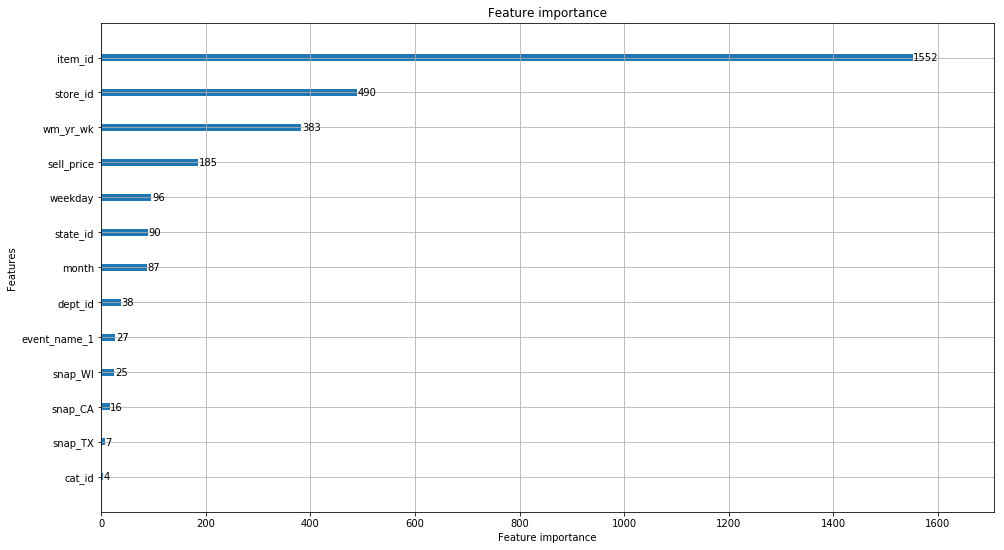

In [17]:
ax = lgb.plot_importance(model, figsize=(16, 9))

In [18]:
joblib.dump(model, model_path)

['..\\models\\model.joblib']